#Computer Vision
###Now we move forward with to computer vison and deal with vision datasets and create a CNN model (multi-class classification) train a model accordingly.


###First lets understand what CNN is:


##Vision libraries to get familiar with:
* torchvision: base domain library for computer vision data, model for pytorch vision.
* torchvision.datasets
* torchvision.models
* torchvision.transforms
* torch.utils.data.Dataset
* torch.utils.data.DataLoader





In [1]:
#basic Imports
import torch
from torch import nn
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# 1. Getting a Dataset

###We will take the FashionMNIST datasets and start exploring it.


In [2]:
#Set up training data
train_data = datasets.FashionMNIST(
    root = "data", # Where to download data to
    train = True, # Do we want training or testing dataset
    download=True,
    transform=ToTensor(), #How do we transform the data: convert it to tensor
    target_transform=None
)

test_data = datasets.FashionMNIST(
    root = "data", # Where to download data to
    train = False, # Do we want training or testing dataset
    download=True,
    transform=ToTensor(), #How do we transform the data: convert it to tensor
    target_transform=None
)

# After running this we can see that our data has been downloaded to data file:

100%|██████████| 26.4M/26.4M [00:02<00:00, 12.5MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 210kB/s]
100%|██████████| 4.42M/4.42M [00:01<00:00, 3.86MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 9.65MB/s]


In [3]:
len(train_data), len(test_data)

(60000, 10000)

In [4]:
image, label = train_data[0]
print(image, label)
class_names = train_data.classes
print(class_names)

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
          0.2863, 0.0000, 0.0000, 0.0039, 0.0157, 0.0000,

In [5]:
# Lets check the shape of image and labels:
print(image.shape)
print(class_names[label])
#Color_channel is 1 as it is black and white image: represented by (0 and 1)


torch.Size([1, 28, 28])
Ankle boot


(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

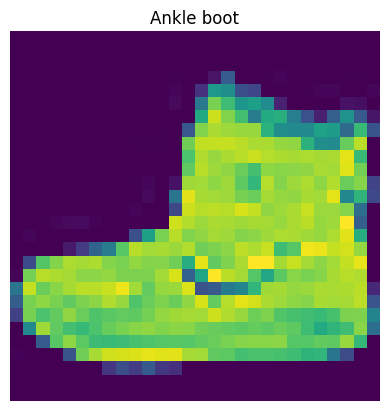

In [6]:
# 1.2 Visualizing our data
plt.imshow(image.squeeze())
plt.title(class_names[label])
plt.axis("off")

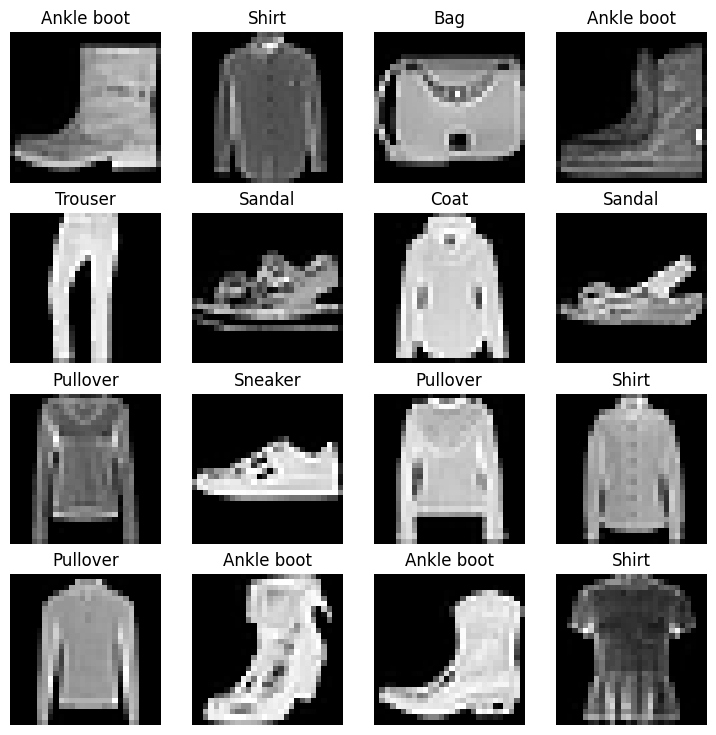

In [7]:
# plot more image:
torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows, cols = 4,4
for i in range(1, rows*cols+1):
  random_idx = torch.randint(0, len(train_data), size=[1]).item()
  image, label = train_data[random_idx]
  fig.add_subplot(rows, cols, i)
  plt.imshow(image.squeeze(), cmap="gray")
  plt.title(class_names[label])
  plt.axis("off")

#2. Prepare DataLoader:
###Right now our data is in form of Pytorch Datasets, DataLoader turns it into a Python iterables.
###Specifically, we want to turn our data to batch and mini-batch- Why?- Computationally efficient, when we have a larger dataset, it becomes very difficult to run everything all at once.
###So we break it down to specific batch at a time. For example batch = 32 represents 32 images at a time. Also it gives more time to calculate gradient descent multiple time.


In [8]:
# Train datasets to dataloader:
train_dataloader = DataLoader(
    dataset = train_data,
    batch_size = 32,
    shuffle=True)
test_dataloader = DataLoader(
    dataset = test_data,
    batch_size = 32,
    shuffle=False)

print(f"Dataloader: {train_dataloader, test_dataloader}")



Dataloader: (<torch.utils.data.dataloader.DataLoader object at 0x7a7d896aee10>, <torch.utils.data.dataloader.DataLoader object at 0x7a7d8dbd3150>)


In [9]:
len(train_dataloader), len(test_dataloader) # Total batch number:


(1875, 313)

In [10]:
#Checking what's inside our dataloader:
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape


(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Label: 8, Class: Bag


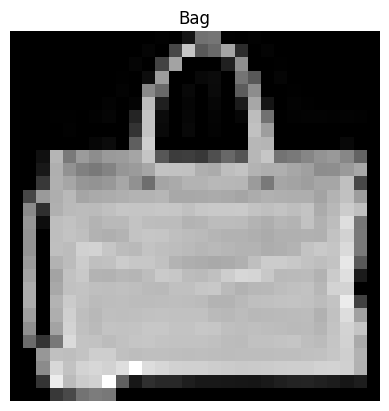

In [11]:
#Show a sample:
#torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
image, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis("off")
print(f"Label: {label}, Class: {class_names[label]}")


In [12]:
#Now our data is ready and we need to start building our model. Here is how we can get started!!
#WE start with a baseline model and we modify it accordingly.

# Create a flatten model

flatten_model = nn.Flatten()

x = train_features_batch[0]

output = flatten_model(x) # PErforms forward pass to flatten_model

print(f"Shape of x: {x.shape}")
print(f"Shape off output: {output.shape}")

output.squeeze() # We get one big vector. Why? our baseline model uses linear model:


Shape of x: torch.Size([1, 28, 28])
Shape off output: torch.Size([1, 784])


tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0039, 0.0039, 0.0000, 0.0000, 0.0078, 0.0078,
        0.0000, 0.0000, 0.0039, 0.0078, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.2863, 0.0000, 0.0000, 0.0078, 

In [13]:
from torch import nn

class FashionMNISTModelV0(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape, out_features=hidden_units),
        nn.Linear(in_features=hidden_units, out_features=output_shape)
    )
  def forward(self, x):
    return self.layer_stack(x)


model_0 = FashionMNISTModelV0(input_shape=784,
                              hidden_units=10,
                              output_shape=len(class_names)) # One for every class:

model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [14]:
#LEts see what our model does with dummy variable:
a = torch.rand([1, 1, 28, 28])
model_0(a), model_0.state_dict() # We can see it provided logits for 10 classes as our dataset is intended to perform.


(tensor([[-0.5382, -0.2103, -0.1958, -0.2007,  0.4601, -0.1884,  0.1586,  0.2547,
          -0.3227, -0.3623]], grad_fn=<AddmmBackward0>),
 OrderedDict([('layer_stack.1.weight',
               tensor([[-0.0042, -0.0145,  0.0237,  ..., -0.0319,  0.0206, -0.0111],
                       [-0.0272,  0.0052,  0.0173,  ...,  0.0023,  0.0029,  0.0097],
                       [ 0.0272, -0.0169,  0.0213,  ...,  0.0307, -0.0014, -0.0287],
                       ...,
                       [-0.0101, -0.0093,  0.0068,  ..., -0.0126, -0.0139, -0.0208],
                       [-0.0275,  0.0082,  0.0330,  ...,  0.0330,  0.0033,  0.0030],
                       [-0.0047, -0.0345,  0.0140,  ...,  0.0228,  0.0321, -0.0169]])),
              ('layer_stack.1.bias',
               tensor([ 0.0152, -0.0084,  0.0227, -0.0054, -0.0284, -0.0354, -0.0013,  0.0105,
                       -0.0211,  0.0281])),
              ('layer_stack.2.weight',
               tensor([[ 0.1500,  0.1907,  0.1457, -0.3050, -0.058

In [15]:
# Now we need to train our model. First we need our loss function and optimizer, and evaluation metrics:

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)


In [16]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  # Note: you need the "raw" GitHub URL for this to work
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

In [17]:
from helper_functions import accuracy_fn

#Lets time our experiment as well:
from timeit import default_timer as timer
from tqdm.auto import tqdm
def print_train_time(start: float, end: float, device: torch.device = None):
  total_time = end - start
  print(f"Train time on {device}: {total_time:.3f} seconds")
  return total_time

In [18]:
start_time = timer()
# some codes
end_time = timer()
print_train_time(start=start_time, end=end_time)

Train time on None: 0.000 seconds


5.7110999989617994e-05

In [19]:
# Lets train our model. First lets create our training loop:
#1. Loop through epoch
#2. Loop through training batches, perform trainingm calculate train loss per batch
#3. Perform same for testing batches
#4. Print out what's happening
#5. Metrics Evaluation/ Model change:

from tqdm.auto import tqdm
torch.manual_seed(42)
train_time_start = timer()
epochs = 3 # So that experiment trains faster with small process
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n-----")
  #Training:
  train_loss = 0
  for batch, (X, y) in enumerate(train_dataloader):
    #0. Setting up the training condition
    model_0.train()

    #1. Getting the prediction values:
    y_pred = model_0(X)

    #2. Calculate loss:
    loss = loss_fn(y_pred, y)
    train_loss += loss
    # 3.Zero grad
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if batch % 400 == 0:
      print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples")
  train_loss /= len(train_dataloader) # Average train_loss per epoch

  ##Testing:
  test_loss, test_acc = 0, 0
  model_0.eval()
  with torch.inference_mode():
    for X_test, y_test in test_dataloader:
      test_pred = model_0(X_test)
      test_loss += loss_fn(test_pred, y_test)
      test_acc += accuracy_fn(y_true=y_test, y_pred=test_pred.argmax(dim=1))
    test_loss /= len(test_dataloader)
    test_acc /= len(test_dataloader)

  print(f"Train loss: {train_loss:.5f} | Test loss: {test_loss:.5f} | Test acc: {test_acc:.2f}")

train_time_end = timer()
total_train_time_model_0 = print_train_time(start=train_time_start, end=train_time_end)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-----
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Train loss: 0.59360 | Test loss: 0.50814 | Test acc: 82.25
Epoch: 1
-----
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Train loss: 0.47598 | Test loss: 0.48270 | Test acc: 82.99
Epoch: 2
-----
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Train loss: 0.45453 | Test loss: 0.47896 | Test acc: 83.48
Train time on None: 32.029 seconds


In [20]:
#4. Make predictions and evaluating our model:

torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):
  loss, acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X, y in data_loader:
      y_pred = model(X)
      loss += loss_fn(y_pred, y)
      acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))
    loss /= len(data_loader)
    acc /= len(data_loader)
  return {"model_name": model.__class__.__name__,
          "model_loss": loss.item(),
          "model_acc": acc}
#Calculate model 0:

model_0_results = eval_model(model=model_0,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn)
model_0_results


{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47896066308021545,
 'model_acc': 83.47643769968052}

In [28]:
#Model 1: We will build a new model with non-linearity as our previous model was linear.
from torch import nn
class FashionMNISTModelV1(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=output_shape),
        nn.ReLU()
    )
  def forward(self, x):
    return self.layer_stack(x)


model_1 = FashionMNISTModelV1(input_shape=28 * 28,
                              hidden_units=10,
                              output_shape=len(class_names)) # One for every class:

model_1.state_dict(), model_1

(OrderedDict([('layer_stack.1.weight',
               tensor([[ 0.0245, -0.0064, -0.0040,  ...,  0.0019,  0.0334, -0.0165],
                       [ 0.0317,  0.0348,  0.0289,  ...,  0.0306,  0.0141,  0.0128],
                       [ 0.0054,  0.0003, -0.0356,  ...,  0.0326, -0.0103,  0.0141],
                       ...,
                       [-0.0308, -0.0227, -0.0170,  ...,  0.0018,  0.0347,  0.0065],
                       [-0.0344,  0.0292, -0.0352,  ..., -0.0059,  0.0345,  0.0185],
                       [-0.0291,  0.0054,  0.0059,  ..., -0.0018, -0.0094,  0.0329]])),
              ('layer_stack.1.bias',
               tensor([-0.0298,  0.0329,  0.0297,  0.0154,  0.0051,  0.0250, -0.0335, -0.0042,
                        0.0021, -0.0241])),
              ('layer_stack.3.weight',
               tensor([[-0.0994,  0.1268, -0.1072,  0.2803, -0.1701,  0.0722, -0.2950, -0.1843,
                        -0.2750,  0.0469],
                       [ 0.1640, -0.1007,  0.1488, -0.2771, -0.297

In [29]:
# Now we will define loss_function and optimizer and accuracy:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model_1.parameters(), lr = 0.01)


In [47]:
#NOw we will create training and testing loop:

def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer:torch.optim.Optimizer, accuracy_fn):
  #Training:
  train_loss, train_acc = 0, 0
  #0. Setting up the training condition
  model.train()
  for batch, (X, y) in enumerate(data_loader):
    #1. Getting the prediction values:
    y_pred = model(X)

    #2. Calculate loss:
    loss = loss_fn(y_pred, y)
    train_loss += loss
    train_acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))

    # 3.Zero grad
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  train_loss /= len(data_loader) # Average train_loss per epoch
  train_acc /= len(data_loader)

  print(f"Train loss: {train_loss:.5f} | Train acc: {train_acc:.2f}")


In [48]:
def test_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):
  test_loss, test_acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X_test, y_test in data_loader:
      test_pred = model(X_test)
      test_loss += loss_fn(test_pred, y_test)
      test_acc += accuracy_fn(y_true=y_test, y_pred=test_pred.argmax(dim=1))
    test_loss /= len(data_loader)
    test_acc /= len(data_loader)
    print(f"Test loss: {test_loss:.5f} | Test acc: {test_acc:.2f}")


In [49]:
#Now we build the training loop:
torch.manual_seed(42)

train_time_Model1_start = timer()
epochs = 3

for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n---")
  train_step(model=model_1,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn
             )
  test_step(model=model_1,
            data_loader=test_dataloader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn)
train_time_Model1_end = timer()
total_train_time_model_1 = print_train_time(start=train_time_Model1_start, end=train_time_Model1_end)


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---
Train loss: 1.19134 | Train acc: 62.65
Test loss: 0.88937 | Test acc: 70.77
Epoch: 1
---
Train loss: 0.80430 | Train acc: 73.94
Test loss: 0.77919 | Test acc: 74.64
Epoch: 2
---
Train loss: 0.73154 | Train acc: 77.34
Test loss: 0.73771 | Test acc: 76.54
Train time on None: 24.650 seconds


In [50]:
model_1_results = eval_model(model=model_1,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn)
model_1_results

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.7377138733863831,
 'model_acc': 76.53753993610223}

In [53]:
# Now we will use a Convolutional Neural Network: or ConvNet

#more layers -> more patterns:

class FashionMNISTModelV2(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d( in_channels=input_shape,
                   out_channels=hidden_units,
                   kernel_size=3, ##Hyperparameters
                   stride=1,
                   padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels= hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2)
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d( in_channels=hidden_units,
                   out_channels=hidden_units,
                   kernel_size=3, ##Hyperparameters
                   stride=1,
                   padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels= hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*7*7, out_features=output_shape) ## Why did we use 7 over here?
    )

    def forward(self, x):
      x = self.conv_block_1(x)
      print(x.shape)
      x = self.conv_block_2(x)
      print(x.shape)
      x = self.classifier(x)
      print(x.shape)
      return x

torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape=1,
                              hidden_units=10,
                              output_shape=len(class_names))
model_2

FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [65]:
torch.manual_seed(42)
image = torch.rand([3, 28, 28])
print(f"Test_image size: {image.size()}")



Test_image size: torch.Size([3, 28, 28])


In [68]:
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=3,
                       stride=1,
                       padding=1)
conv_output = conv_layer(image.unsqueeze(0))
conv_output.shape



torch.Size([1, 10, 28, 28])